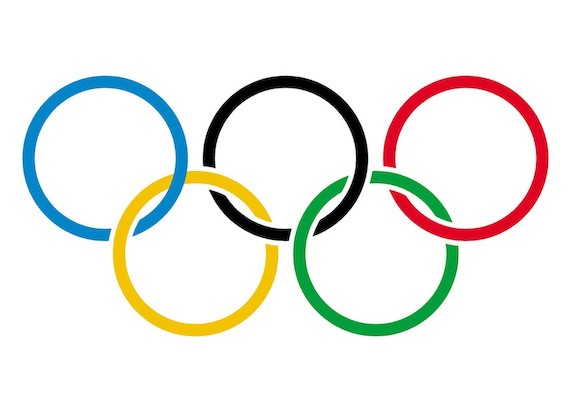

<strong><div style = "height:100px;line-height:100px;text-align:center;background-color:#00ff99;font-size:25px;border-radius:25px;font-family: Times New Roman">
  Olympics: Archery, Diving, Gymnastics, Hockey, and Volleyball
</div></strong>

<strong><div style = "height:65px;line-height:65px;text-align:center;background-color:#00ff99;font-size:20px;border-radius:25px;font-family: Times New Roman">
  By: Megan Stanton, Josh Gray, and Jaidin Jackson
</div></strong>

In [292]:
import requests, re, nltk, operator
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter

def ConvertCountries(item):
    temp = item
    if(item == "KOR"):
        temp = "South Korea"
    if(item == "USA"):
        temp = "United States"
    if(item == "URS"):
        temp = "Soviet Union"
    if(item == "FIN"):
        temp = "Finland"
    if(item == "FRA"):
        temp = "France"
    if(item == "AUS"):
        temp = "Australia"
    if(item == "ITA"):
        temp = "Italy"
    if(item == "UKR"):
        temp = "Ukraine"
    if(item == "CHN"):
        temp = "China"
    if(item == "GBR"):
        temp = "United Kingdom"
    if(item == "JPN"):
        temp = "Japan"
    if(item == "EUN"):
        temp = "Unified Team"
    if(item == "NED"):
        temp = "Netherlands"
    if(item == "RUS"):
        temp = "Russia"
    if(item == "SWE"):
        temp = "Sweden"
    if(item == "CAN"):
        temp = "Canada"
    if(item == "MEX"):
        temp = "Mexico"
    if(item == "GDR"):
        temp = "East Germany"
    if(item == "GER"):
        temp = "Germany"
    if(item == "ROU"):
        temp = "Romania"
    if(item == "BUL"):
        temp = "Bulgaria"
    if(item == "HUN"):
        temp = "Hungary"
    if(item == "ESP"):
        temp = "Spain"
    if(item == "GRE"):
        temp = "Greece"
    if(item == "LAT"):
        temp = "Latvia"
    if(item == "PAK"):
        temp = "Pakistan"
    if(item == "NZL"):
        temp = "New Zealand"
    if(item == "IND"):
        temp = "India"
    if(item == "ZIM"):
        temp = "Zimbabwe"
    if(item == "ARG"):
        temp = "Argentina"
    if(item == "FRG"):
        temp = "West Germany"
    if(item == "TCH"):
        temp = "Czechoslovakia"
    if(item == "BRA"):
        temp = "Brazil"
    if(item == "CUB"):
        temp = "Cuba"
    if(item == "POL"):
        temp = "Poland"
    if(item == "YUG"):
        temp = "Yugoslavia"
    if(item == "SUI"):
        temp = "Switzerland"
    if(item == "PER"):
        temp = "Peru"
    return temp

def readData(data):
    Data = data.readlines()

    gold = {}
    bronze = {}
    silver = {}
    for count,x in enumerate(Data):
        temp = x.split()
        for index,y in enumerate(temp):
            if (y == "Men" or y == "Women"):
                save = index + 1
            if(y == "M" or y == "W"):
                save2 = index + 1
        temp2 = ConvertCountries(temp[save])
        if(temp[save2] == "Gold"):
            if temp2 in gold: gold [temp2] = gold [temp2] + 1
            else:  gold [temp2] = 1
        if(temp[save2] == "Silver"):
            if temp2 in silver: silver [temp2] = silver [temp2] + 1
            else:  silver [temp2] = 1
        if(temp[save2] == "Bronze"):
            if temp2 in bronze: bronze [temp2] = bronze [temp2] + 1
            else:  bronze [temp2] = 1
                
    goldS = sorted (gold.items(), key = operator.itemgetter(1), reverse=True)
    bronzeS = sorted (bronze.items(), key = operator.itemgetter(1), reverse=True)
    silverS = sorted (silver.items(), key = operator.itemgetter(1), reverse=True)
    
    print("Gold")
    for i in range(0,len(goldS),1):
        print (goldS[i][0]+"\t"+str(goldS[i][1]))
    print("\n")
    print("Silver")
    for i in range(0,len(bronzeS),1):
        print (bronzeS[i][0]+"\t"+str(bronzeS[i][1]))
    print("\n")
    print("Bronze")
    for i in range(0,len(silverS),1):
        print (silverS[i][0]+"\t"+str(silverS[i][1]))
    print("\n")
    return(goldS,bronzeS,silverS)

<strong><div style = "height:100px;line-height:100px;text-align:center;background-color:#00ff99;font-size:50px;border-radius:25px;font-family: Times New Roman">
  Medal Data
</div></strong>

<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Archery Medal Data</b>
</div></body></center>

In [293]:
archery = open('../data/archery.txt','r')
(goldAS, bronzeAS, silverAS) = readData(archery)

Gold
South Korea	6
United States	5
Soviet Union	1
Finland	1
France	1
Australia	1
Italy	1
Ukraine	1
China	1


Silver
South Korea	5
Italy	2
Soviet Union	2
United Kingdom	2
Finland	1
Japan	1
Unified Team	1
Ukraine	1
Netherlands	1
Australia	1
Russia	1


Bronze
South Korea	8
Soviet Union	3
Japan	2
United States	2
China	2
Sweden	1




In [305]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

def plotTogetherLists(gold, silver, bronze, title):
    exist = 0
    countries = []
    goldlist = []
    bronzelist = []
    silverlist = []
    for item in gold:
        for test in countries:
            if(test == item[0]):
                exist = 1
        if(exist != 1):
            countries.append(item[0])
        else:
            exist = 0
    for item in silver:
        for test in countries:
            if(test == item[0]):
                exist = 1
        if(exist != 1):
            countries.append(item[0])
        else:
            exist = 0
    for item in bronze:
        for test in countries:
            if(test == item[0]):
                exist = 1
        if(exist != 1):
            countries.append(item[0])
        else:
            exist = 0
            
    countries.sort()    
    
    exist = 0
    for item in countries:
        for test in gold:
            if(test[0] == item):
                goldlist.append(test[1])
                exist = 1
        if(exist != 1):
            goldlist.append(int(0))
        else:
            exist = 0
            
        for test in silver:
            if(test[0] == item):
                silverlist.append(test[1])
                exist = 1
        if(exist != 1):
            silverlist.append(int(0))
        else:
            exist = 0
        
        for test in bronze:
            if(test[0] == item):
                bronzelist.append(test[1])
                exist = 1
        if(exist != 1):
            bronzelist.append(int(0))
        else:
            exist = 0
            
    f = plt.figure (figsize=(75, 30))
    golds = np.array(goldlist)
    bronzes = np.array(bronzelist)
    silvers = np.array(silverlist)
    ind = [x for x, _ in enumerate(countries)]

    plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
    plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
    plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

    plt.xticks(ind, countries, fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.ylabel("Medals", fontsize=70)
    plt.xlabel("Countries", fontsize = 70)
    plt.legend(loc="upper right", fontsize = 40)
    plt.figtext(.5,.9, title, fontsize=100, ha='center')
    
    plt.show()
    
    
    
goldARS = goldAS [ 0:len(goldAS) ] [::-1]
silverARS = silverAS [ 0:len(silverAS) ] [::-1]
bronzeARS = bronzeAS [ 0:len(bronzeAS) ] [::-1]

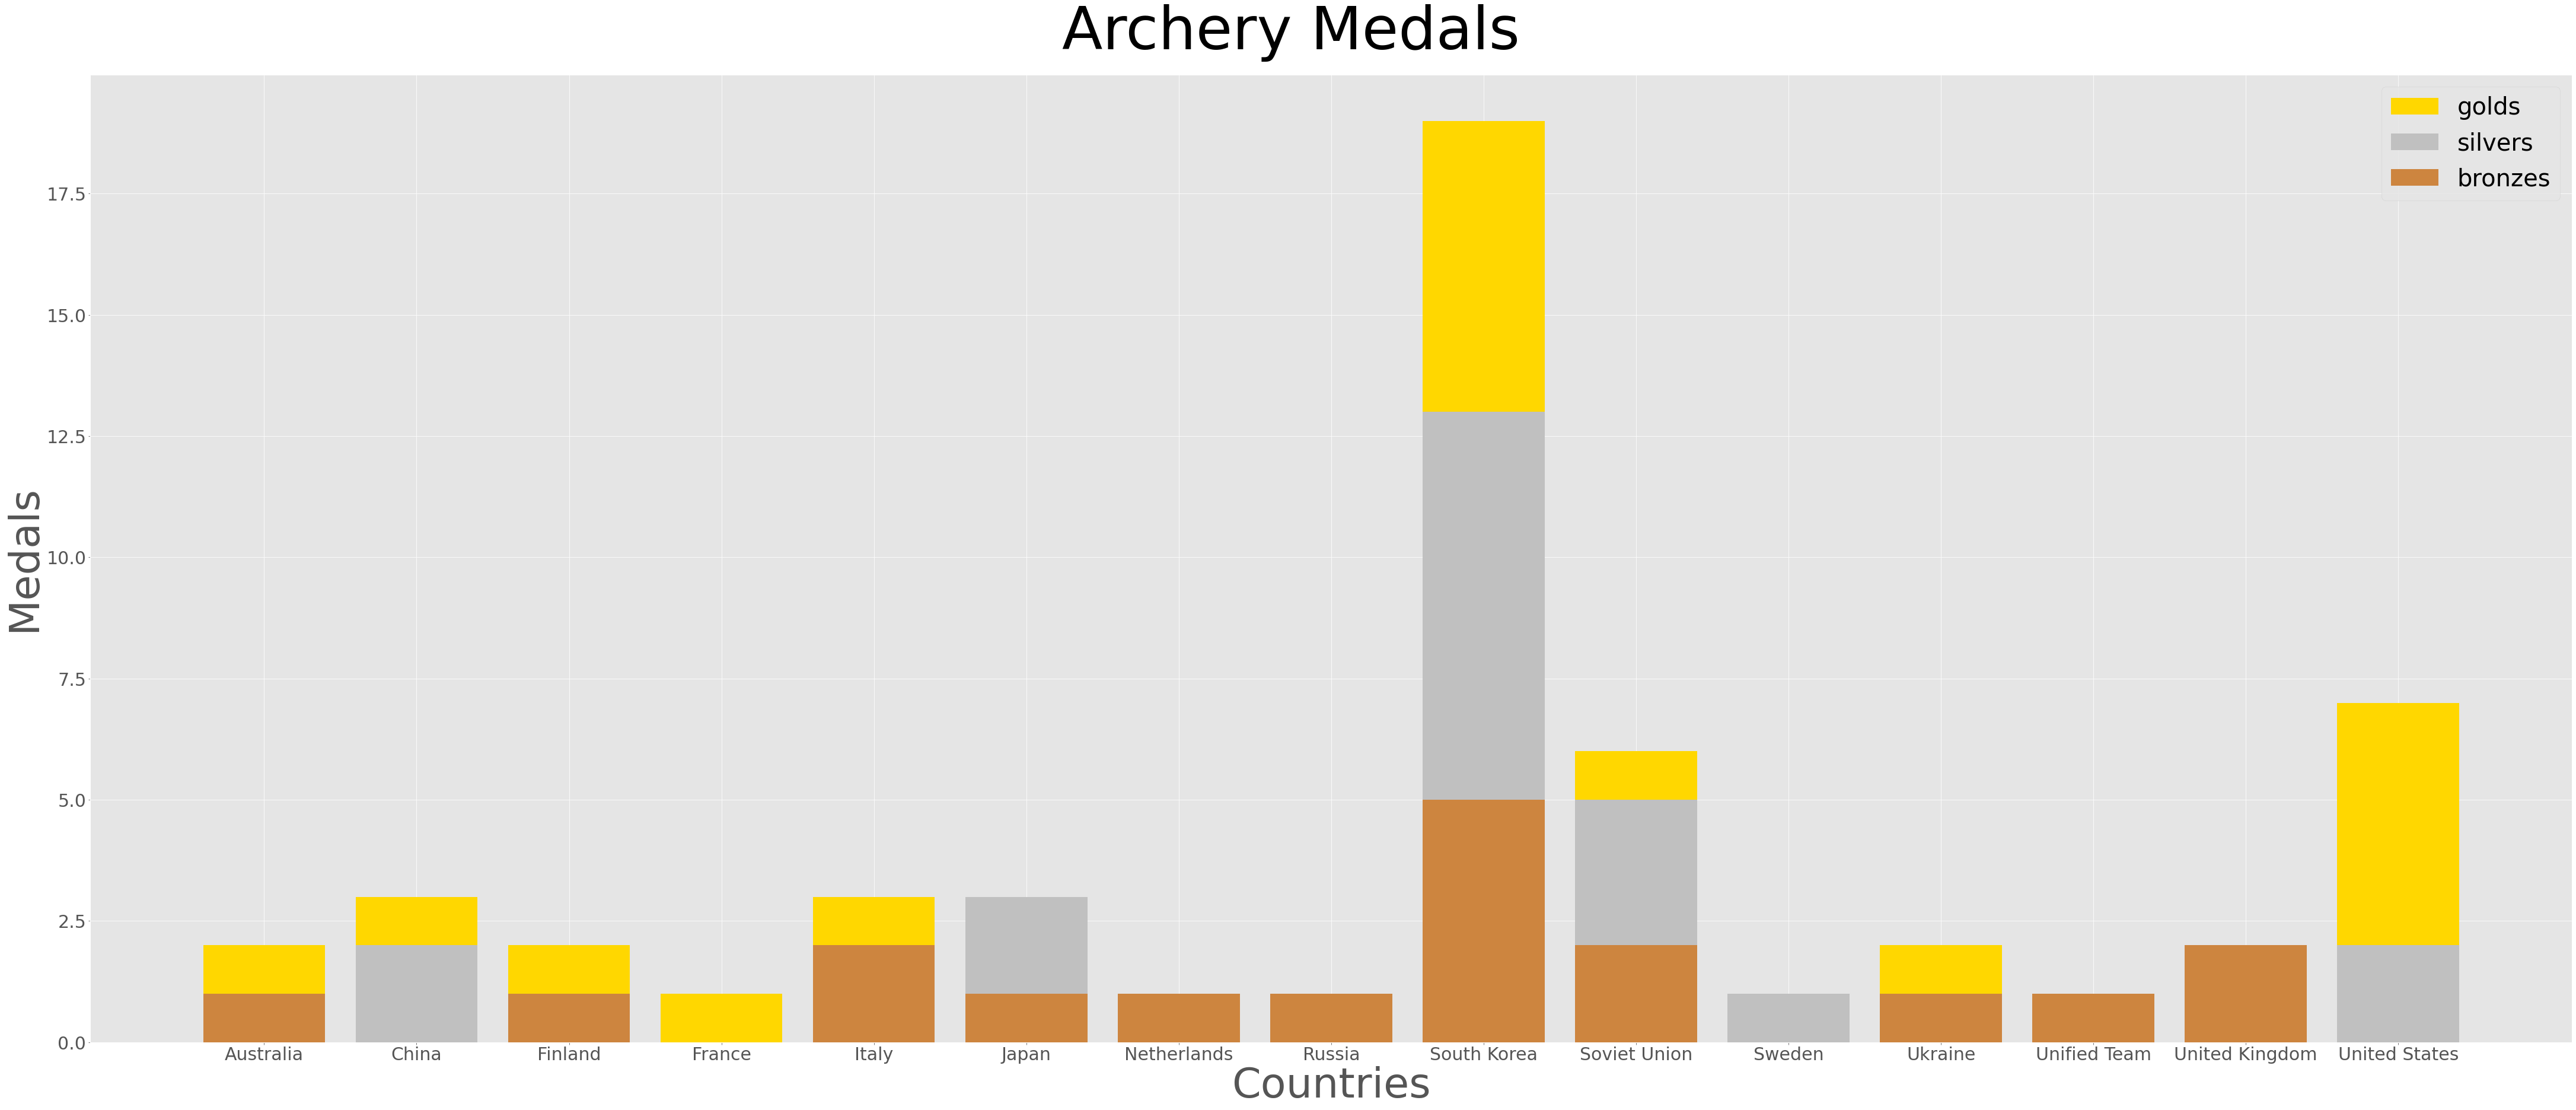

In [306]:
plotTogetherLists(goldARS, silverARS, bronzeARS, "Archery Medals")

<strong><center>Top three countries: South Korea, United States, Soviet Union</center></strong>

<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Diving 3M Springboard Medal Data</b>
</div></body></center>

In [296]:
diving3 = open('../data/diving3.txt','r')
(goldD3S, bronzeD3S, silverD3S) = readData(diving3)

Gold
China	10
United States	5
Soviet Union	2
Canada	1


Silver
United States	5
China	3
Russia	3
Germany	2
Soviet Union	1
East Germany	1
Italy	1
Unified Team	1
Canada	1


Bronze
China	7
East Germany	2
Mexico	2
Russia	2
Canada	2
Italy	1
United States	1
Unified Team	1




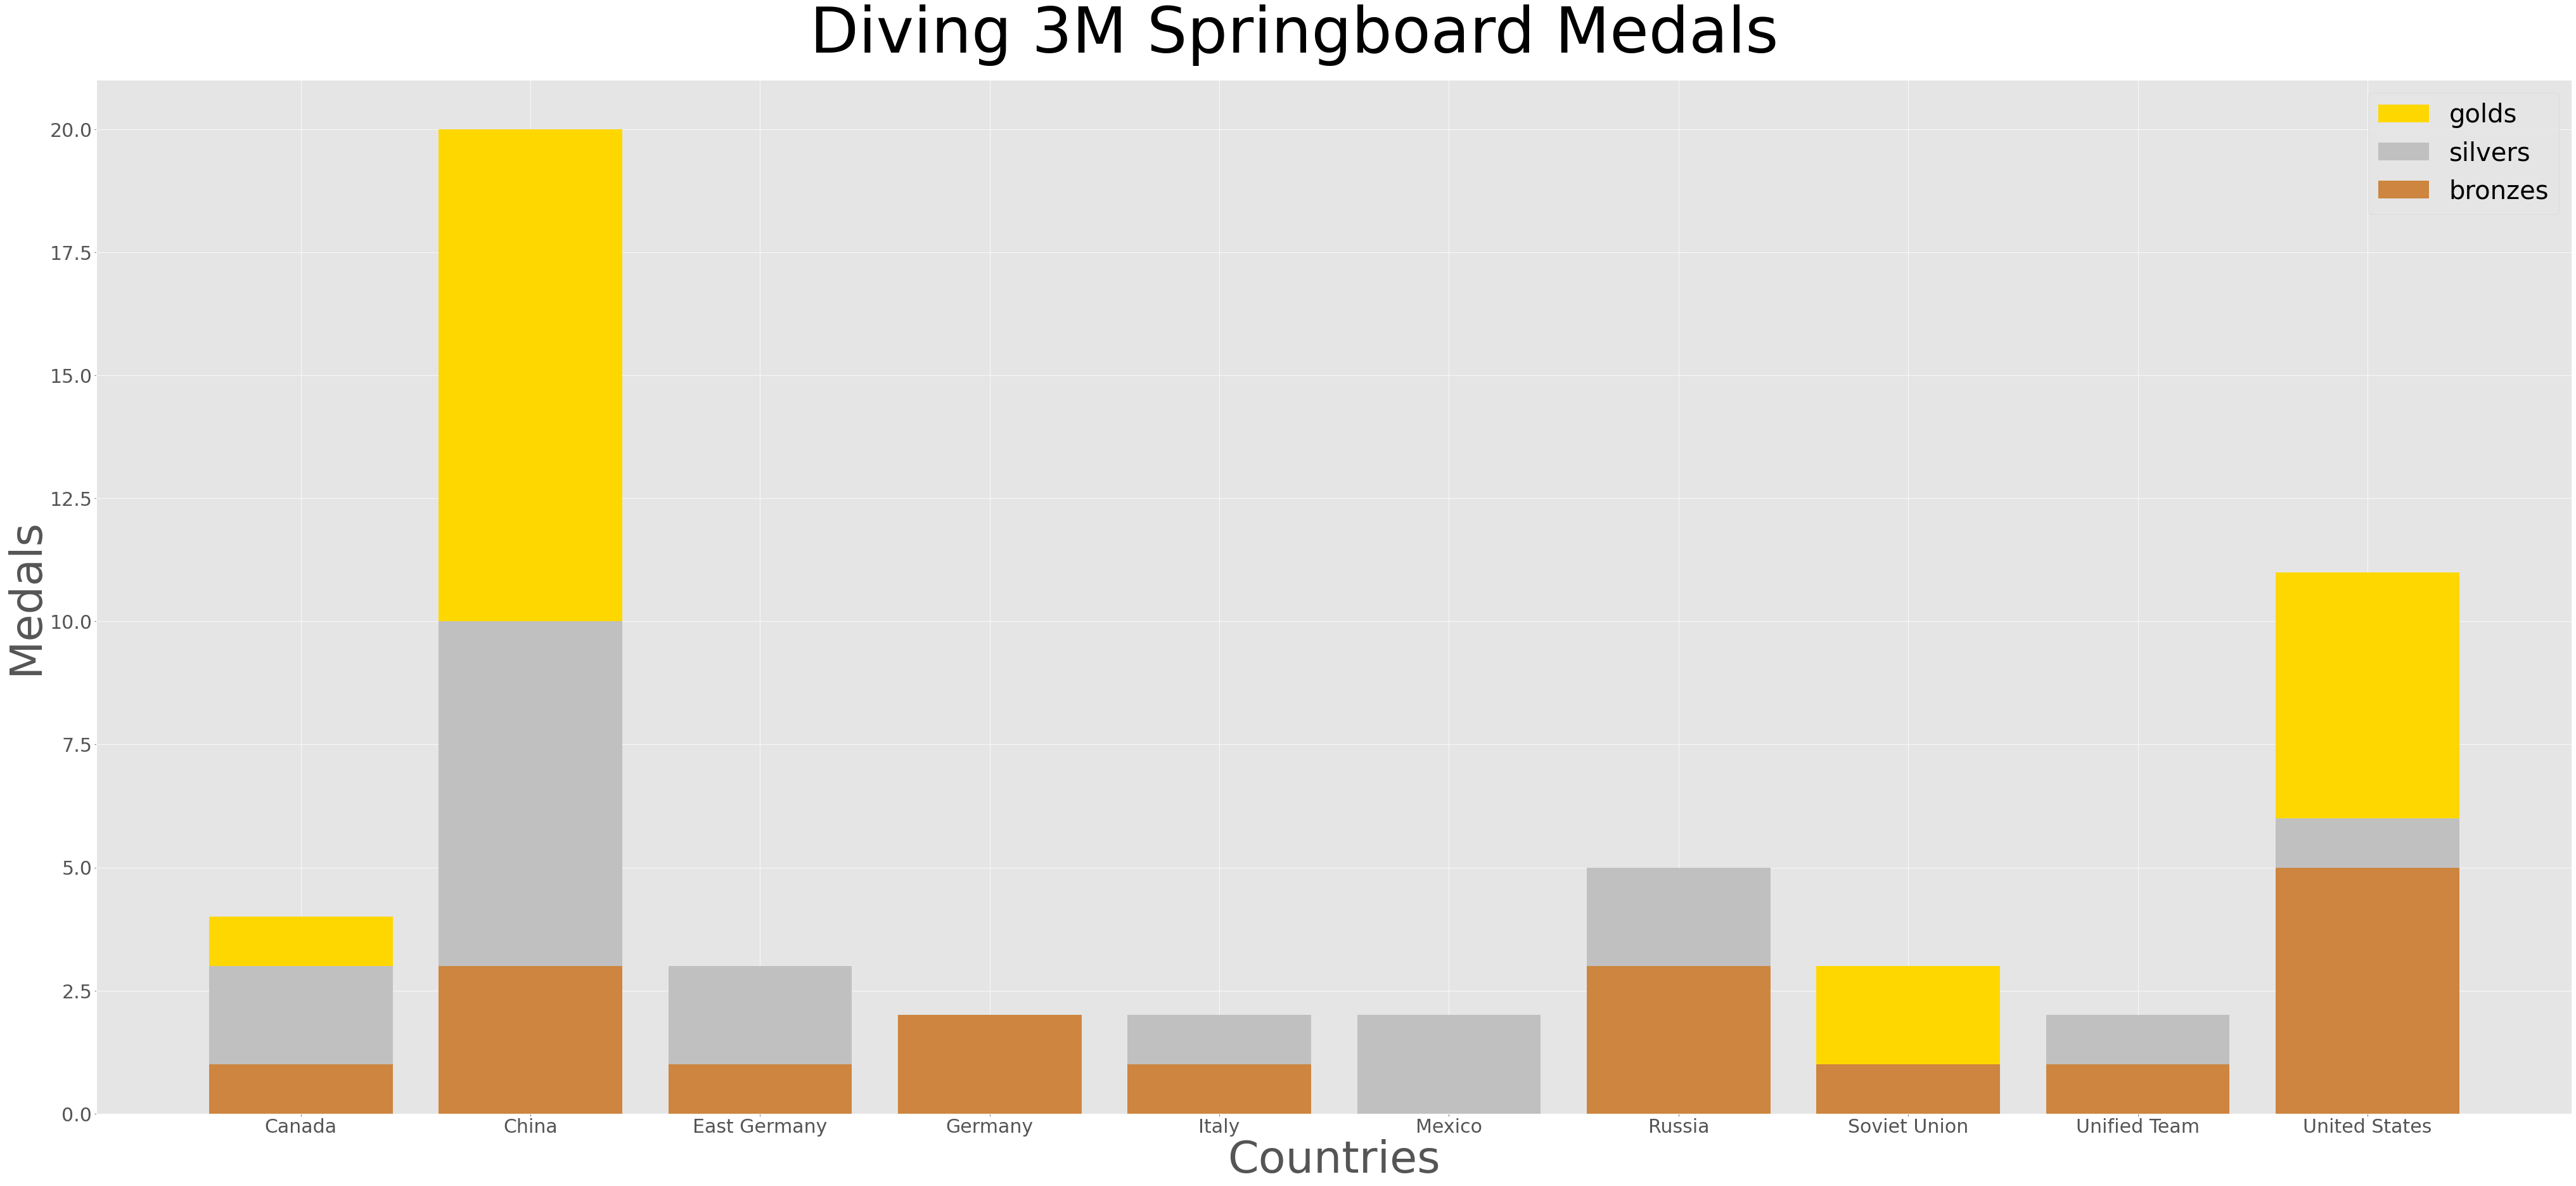

In [297]:
goldD3RS = goldD3S [ 0:len(goldD3S) ] [::-1]
silverD3RS = silverD3S [ 0:len(silverD3S) ] [::-1]
bronzeD3RS = bronzeD3S [ 0:len(bronzeD3S) ] [::-1]
plotTogetherLists(goldD3RS,silverD3RS,bronzeD3RS, "Diving 3M Springboard Medals")

<strong><center>Top three countries: China, United States, Russia</center></strong>

<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Diving 10M Springboard Medal Data</b>
</div></body></center>

In [298]:
diving10 = open('../data/diving10.txt','r')
(goldD10S, bronzeD10S, silverD10S) = readData(diving10)

Gold
China	8
United States	3
East Germany	2
Australia	2
Soviet Union	1
Italy	1
Russia	1


Silver
United States	5
China	5
Soviet Union	3
Russia	2
Mexico	1
Canada	1
Australia	1


Bronze
United States	5
China	5
Soviet Union	2
Germany	2
Sweden	1
Unified Team	1
Australia	1
Canada	1




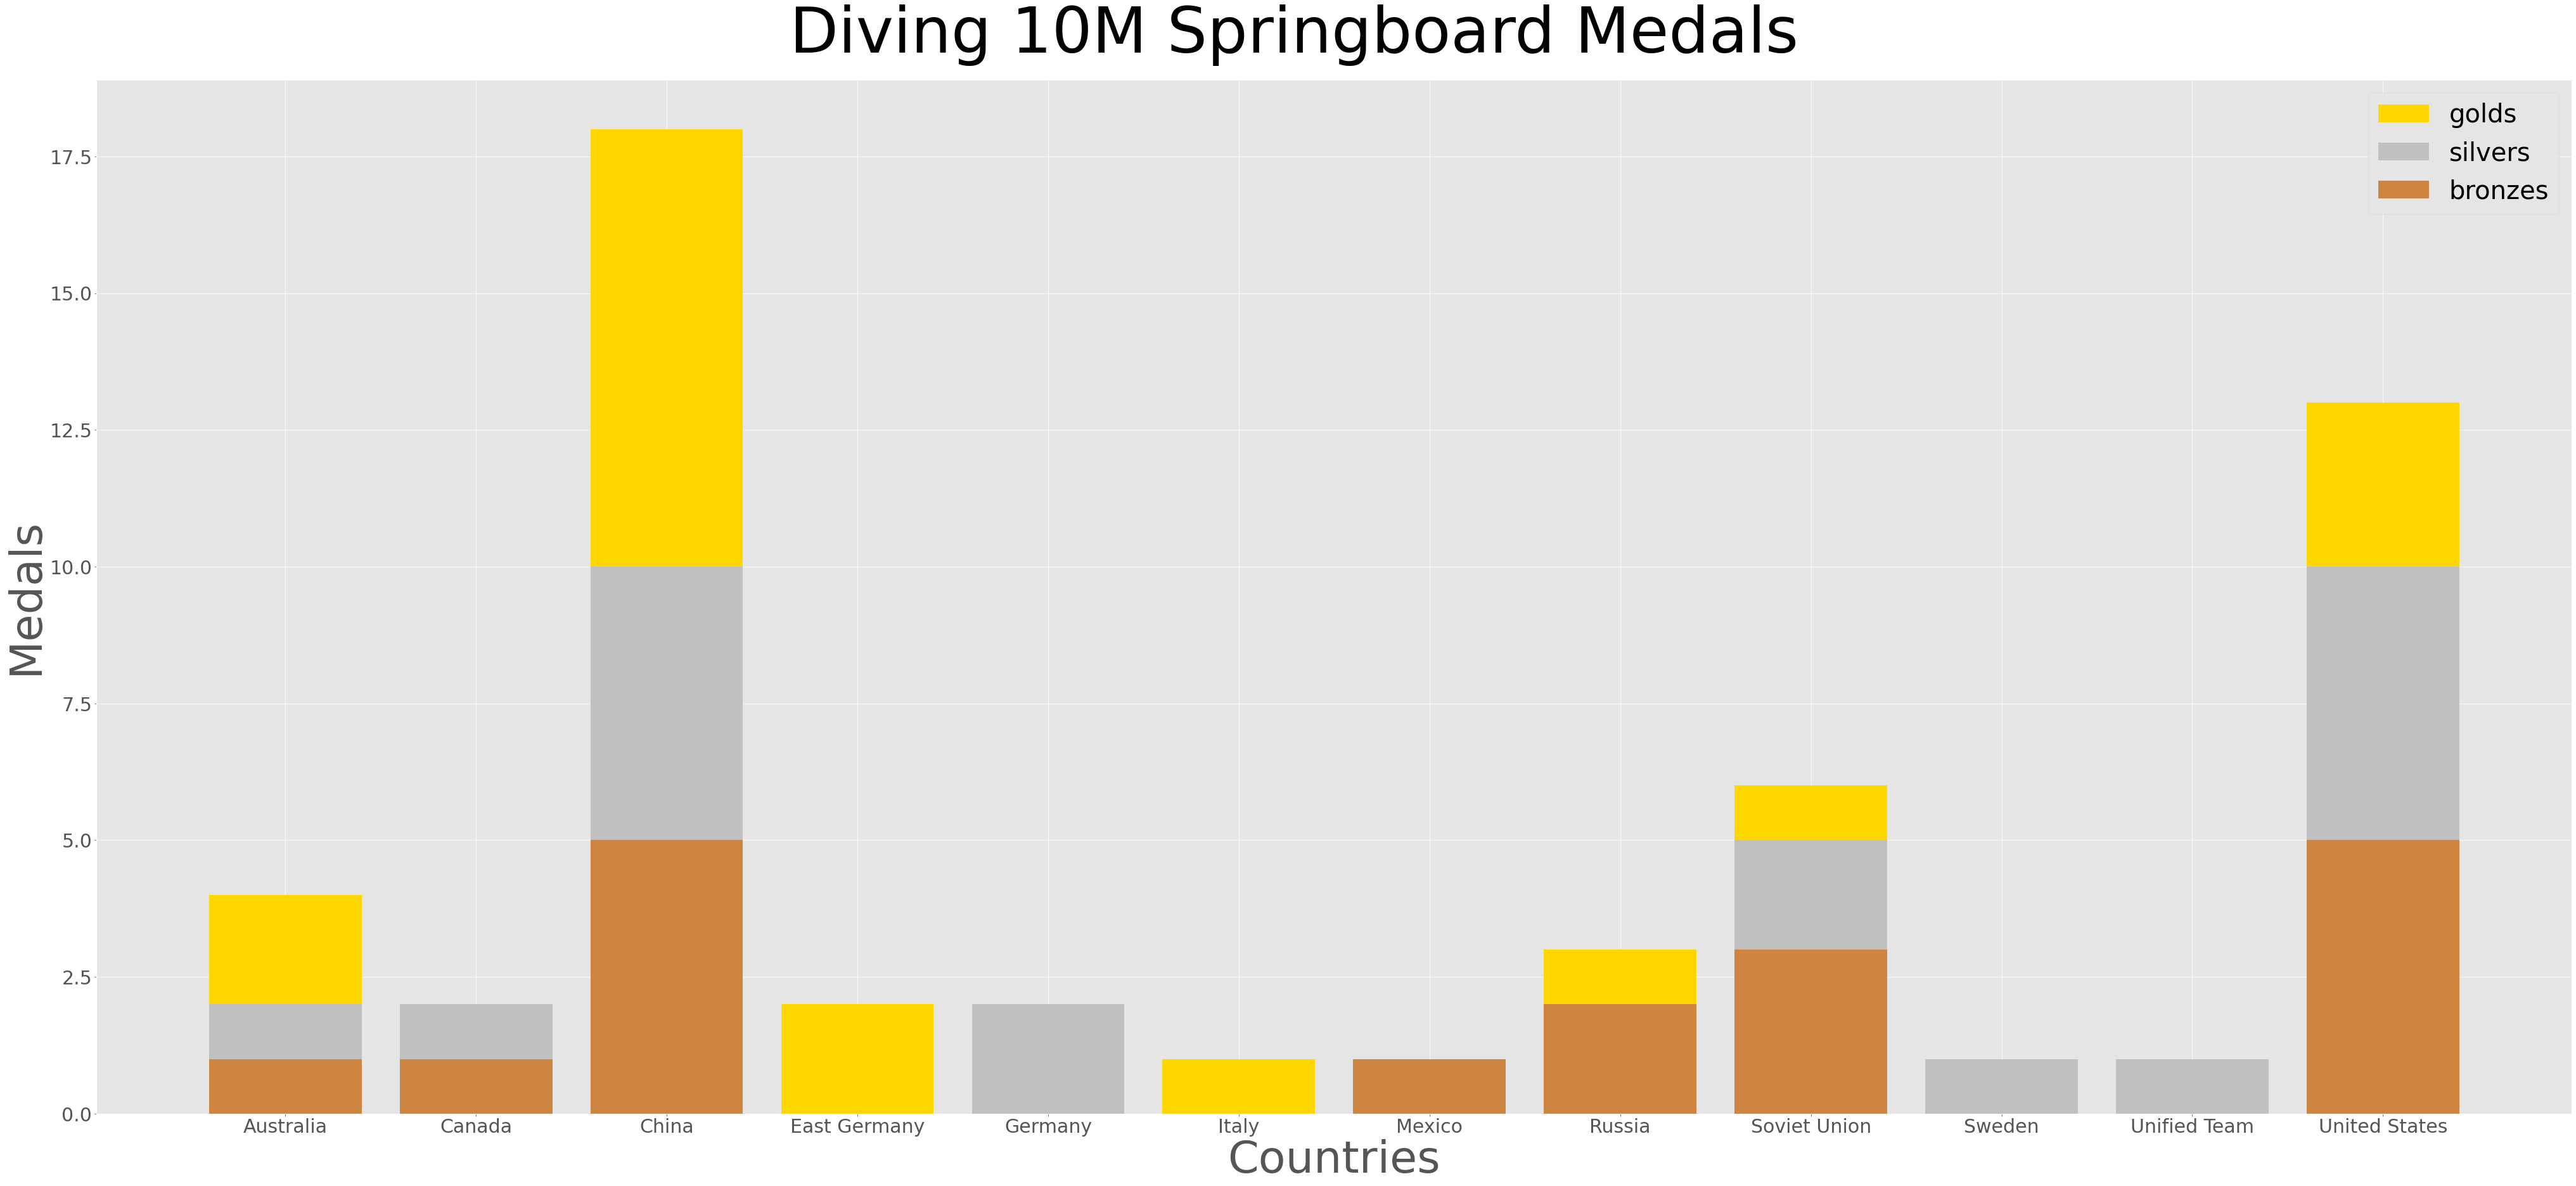

In [299]:
goldD10RS = goldD10S [ 0:len(goldD10S) ] [::-1]
silverD10RS = silverD10S [ 0:len(silverD10S) ] [::-1]
bronzeD10RS = bronzeD10S [ 0:len(bronzeD10S) ] [::-1]
plotTogetherLists(goldD10RS,silverD10RS,bronzeD10RS, "Diving 10M Springboard Medals")

<strong><center>Top three countries: China, United States, Soviet Union</center></strong>

<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Gymnastics Floor Exercises Medal Data</b>
</div></body></center>

In [300]:
gymnastics = open('../data/gymnastics.txt','r')
(goldGS, bronzeGS, silverGS) = readData(gymnastics)

Gold
Romania	6
Soviet Union	4
China	3
East Germany	1
Ukraine	1
Greece	1
Russia	1
Latvia	1
Canada	1


Silver
United States	5
Romania	3
Bulgaria	3
Soviet Union	2
Japan	2
Russia	2
East Germany	1
France	1
China	1
Unified Team	1
Spain	1


Bronze
Soviet Union	5
Romania	3
United States	2
China	2
Russia	2
Hungary	1
Japan	1
Unified Team	1
Spain	1




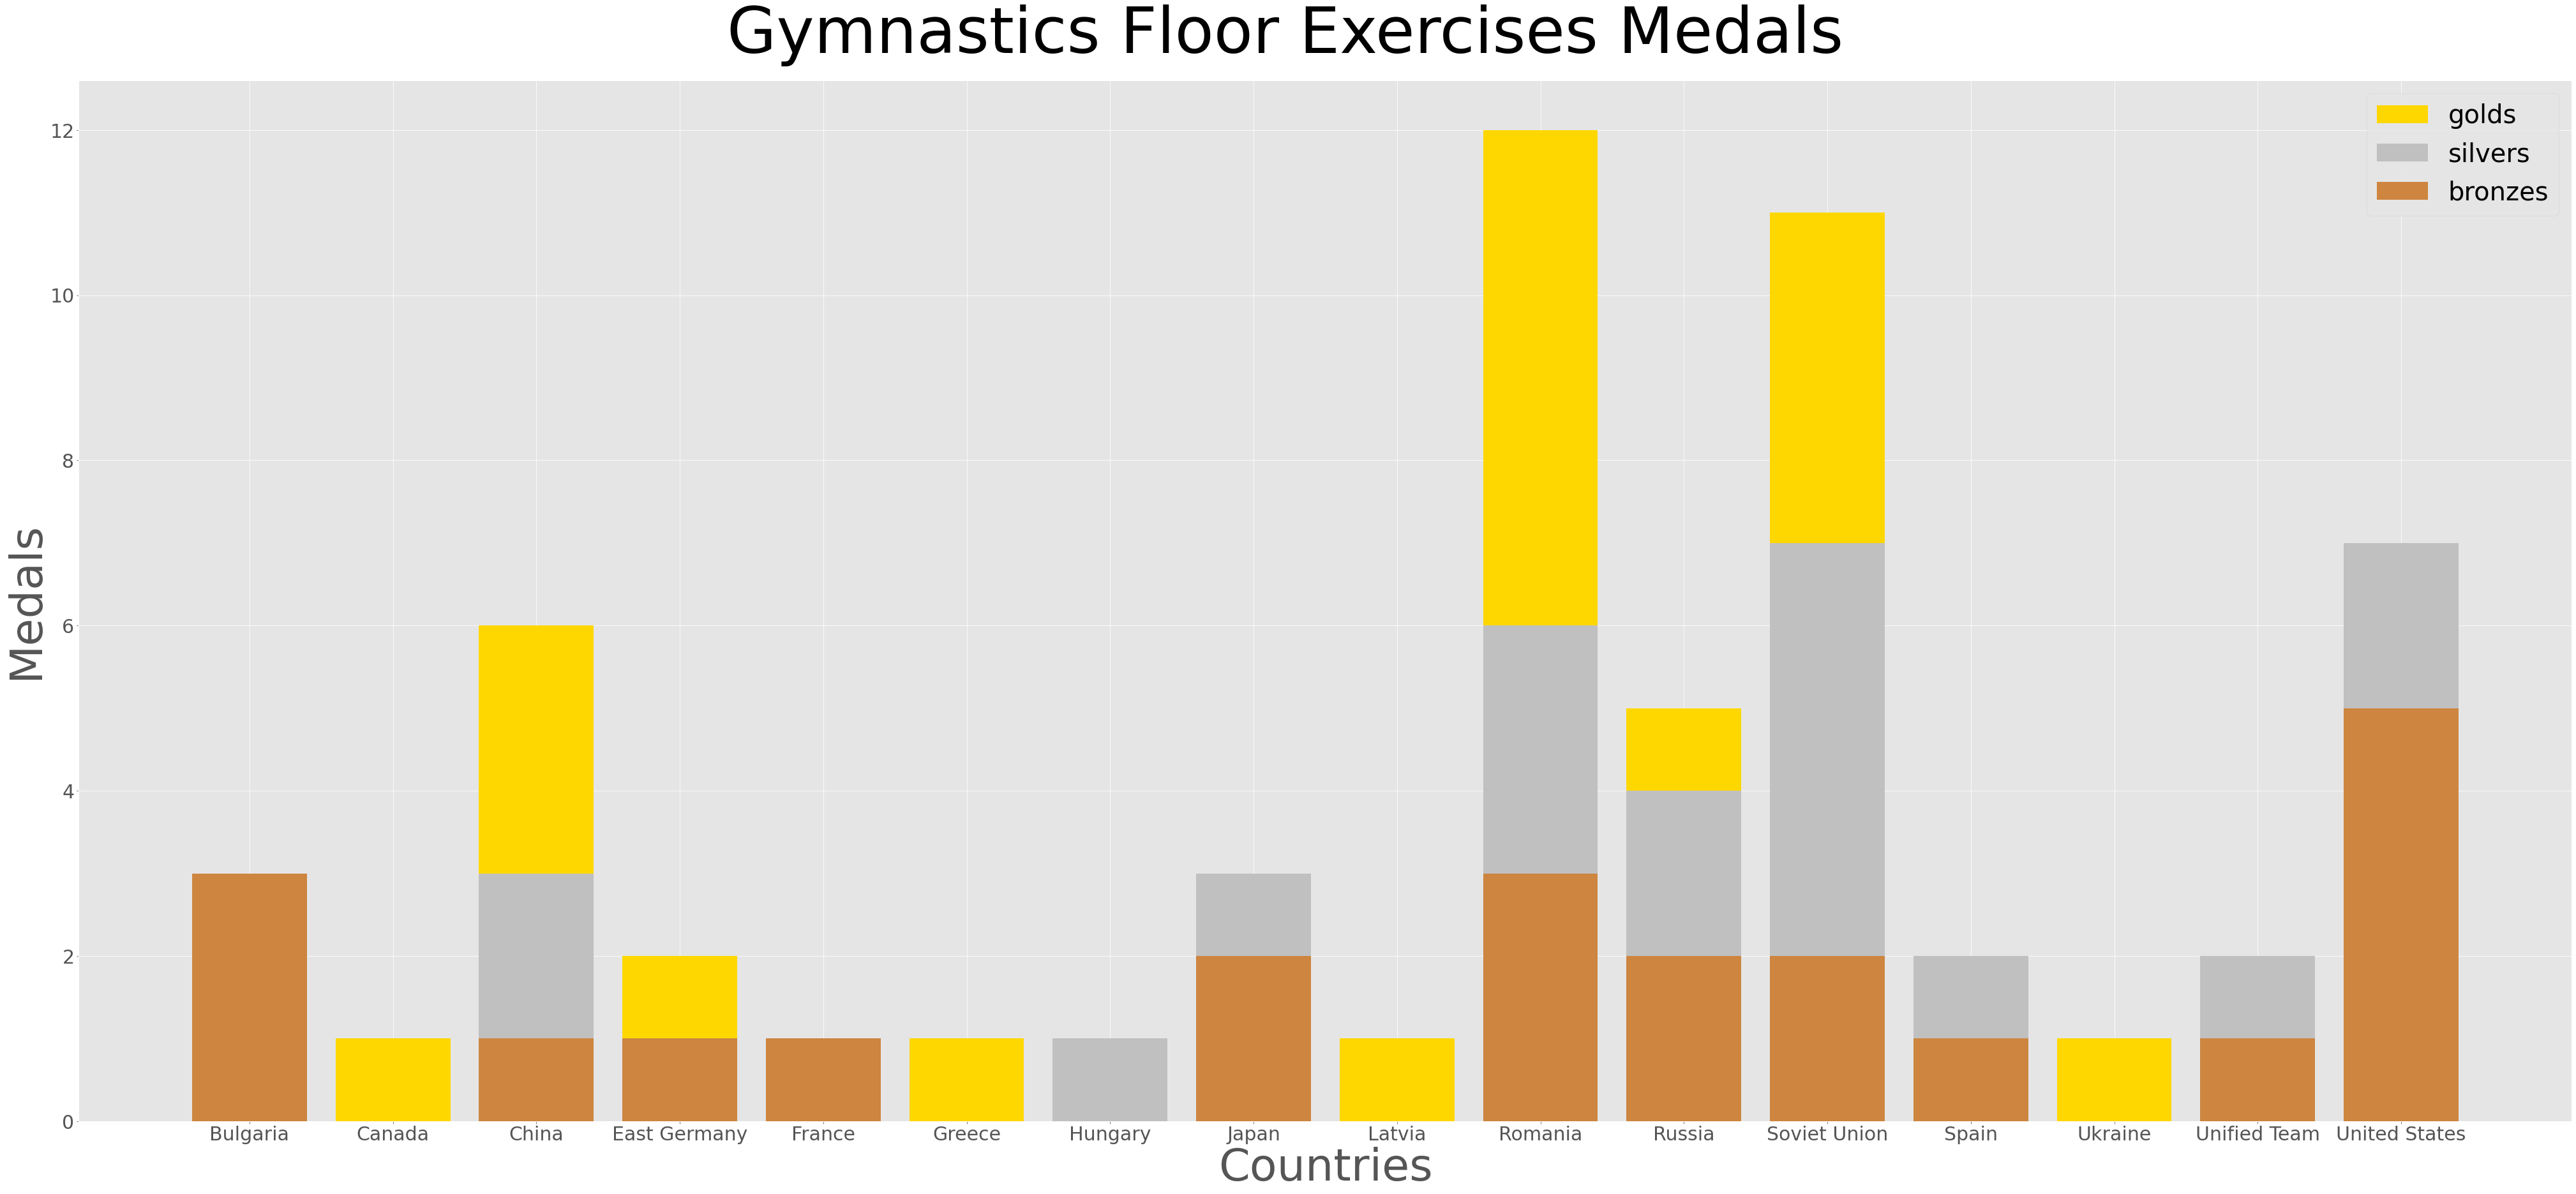

In [260]:
goldGRS = goldGS [ 0:len(goldGS) ] [::-1]
silverGRS = silverGS [ 0:len(silverGS) ] [::-1]
bronzeGRS = bronzeGS [ 0:len(bronzeGS) ] [::-1]
plotTogetherLists(goldGRS,silverGRS,bronzeGRS, "Gymnastics Floor Exercises Medals")

<strong><center>Top three countries: Romania, Soviet Union, United States</center></strong>

<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Hockey Medal Data</b>
</div></body></center>

In [301]:
hockey = open('../data/hockey.txt','r')
(goldHS, bronzeHS, silverHS) = readData(hockey)

Gold
Netherlands	64
Australia	64
Germany	49
New Zealand	16
India	16
Zimbabwe	16
Pakistan	16
United Kingdom	16
Spain	16


Silver
Netherlands	64
Australia	49
Pakistan	32
Soviet Union	32
United Kingdom	32
Argentina	32
United States	16
Germany	16


Bronze
Spain	48
West Germany	48
South Korea	48
Australia	32
Netherlands	31
Czechoslovakia	16
Germany	16
Argentina	16
China	16




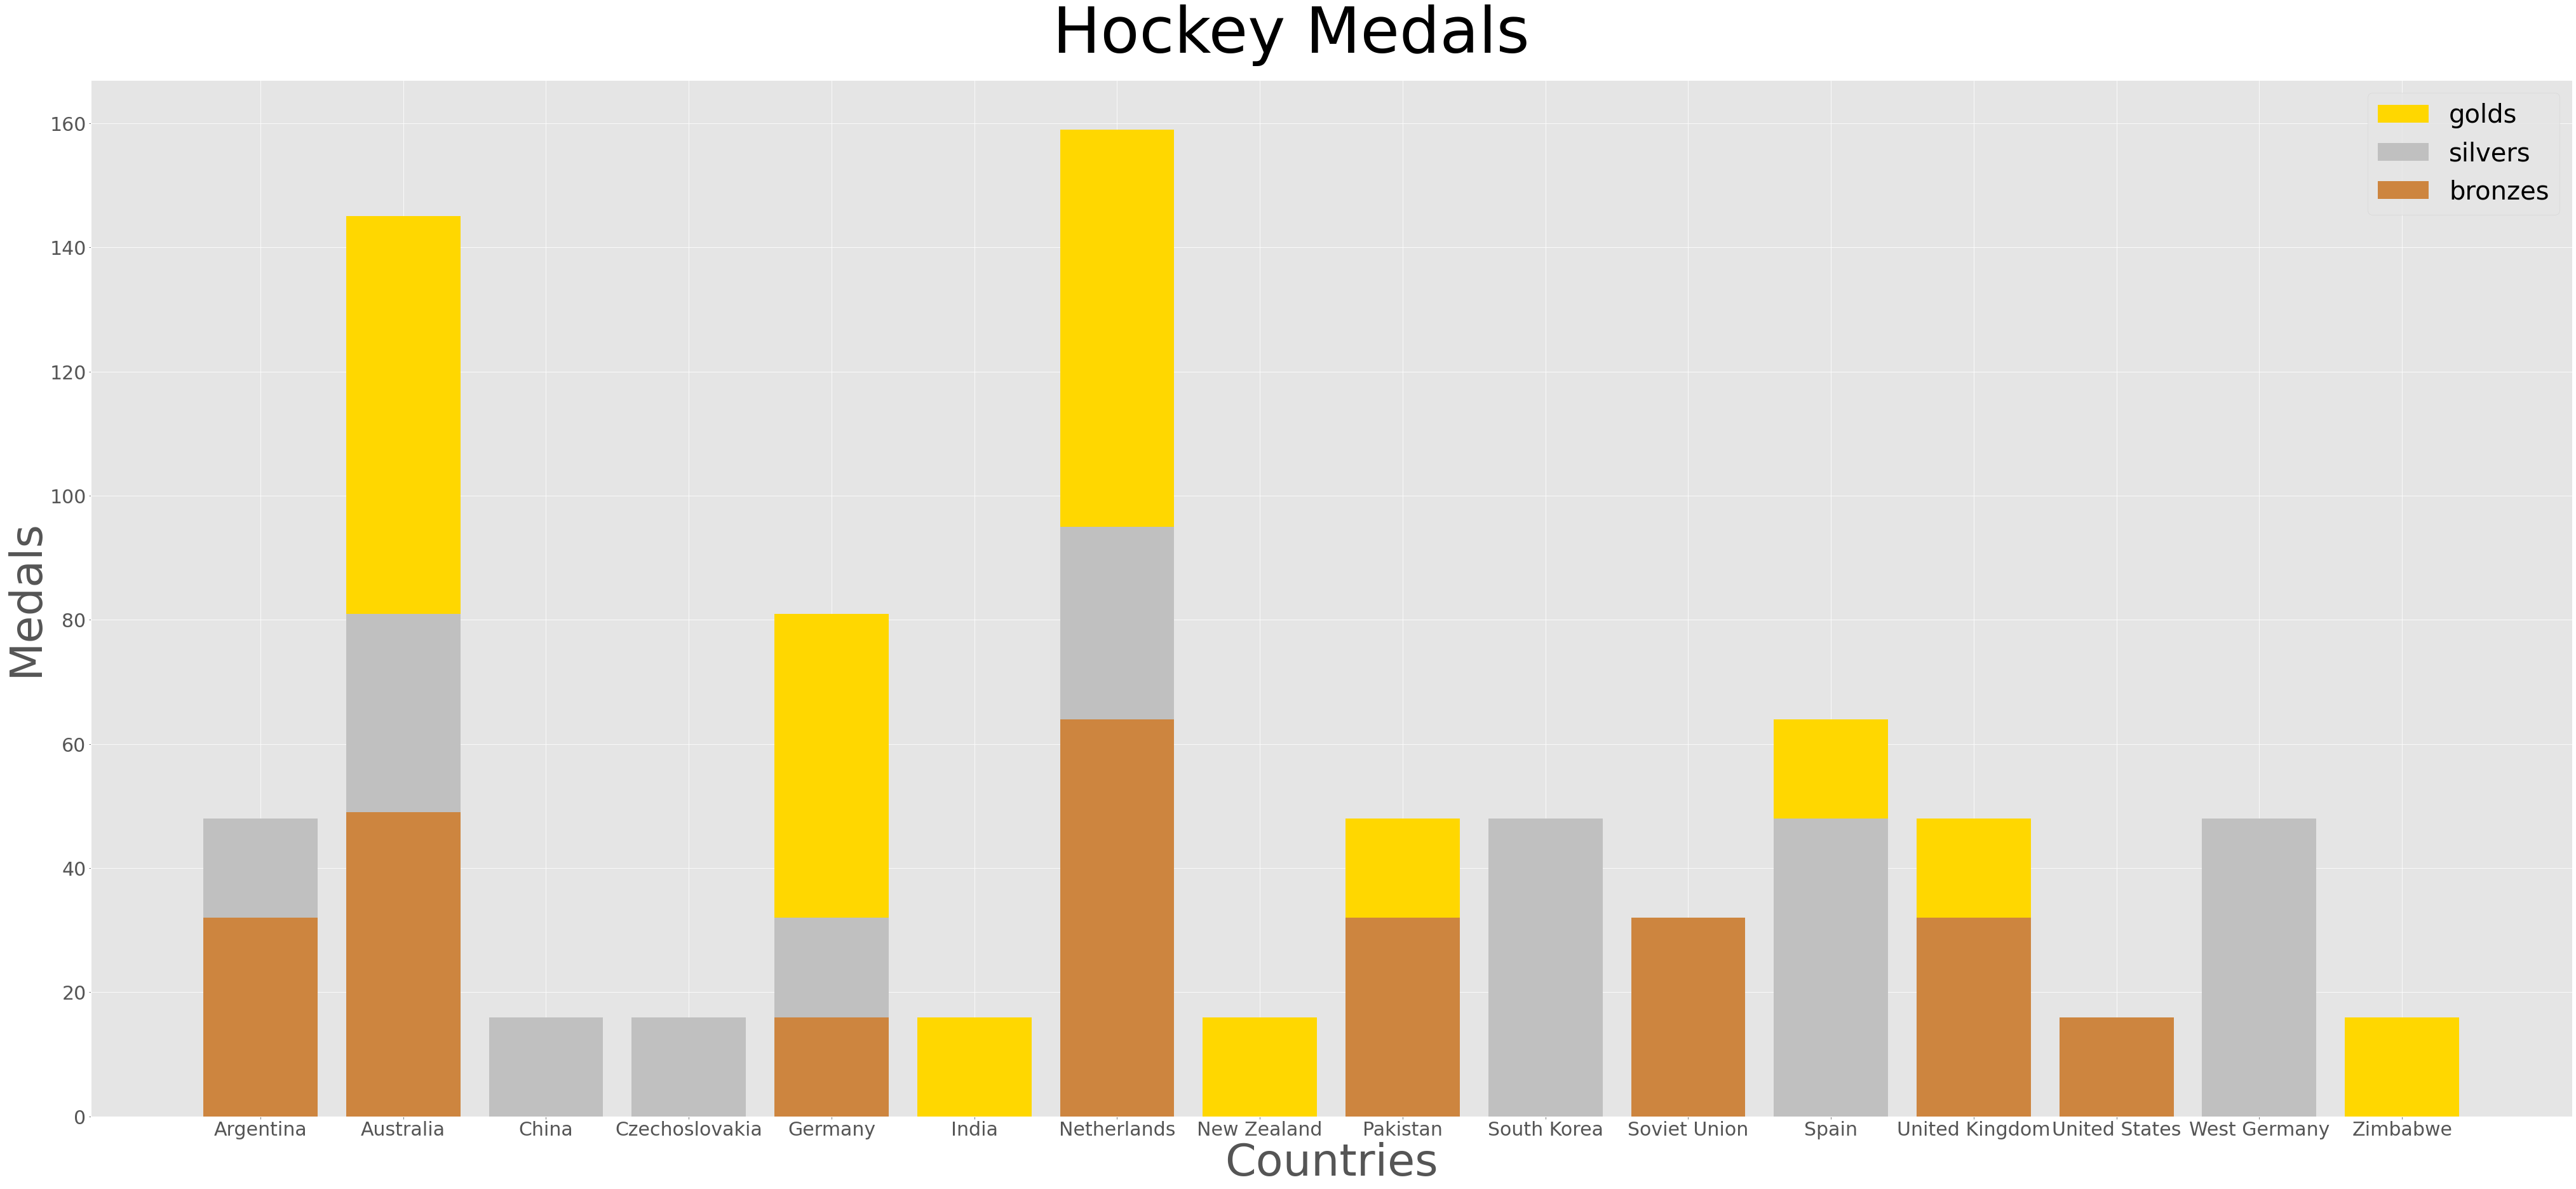

In [302]:
goldHRS = goldHS [ 0:len(goldHS) ] [::-1]
silverHRS = silverHS [ 0:len(silverHS) ] [::-1]
bronzeHRS = bronzeHS [ 0:len(bronzeHS) ] [::-1]
plotTogetherLists(goldHRS,silverHRS,bronzeHRS, "Hockey Medals")

<strong><center>Top three countries: Netherlands, Australia, Germany</center></strong>

<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Volleyball Medal Data</b>
</div></body></center>

In [303]:
volleyball = open('../data/volleyball.txt','r')
(goldVS, bronzeVS, silverVS) = readData(volleyball)

Gold
United States	46
Brazil	40
Soviet Union	36
Cuba	36
China	24
Poland	12
Japan	12
Netherlands	12
Yugoslavia	12
Australia	2


Silver
Brazil	28
China	26
United States	26
Cuba	24
Italy	24
Russia	24
South Korea	12
Bulgaria	12
Romania	12
Japan	12
Argentina	12
Yugoslavia	12
Canada	2
Australia	2
Germany	2
Switzerland	2


Bronze
Soviet Union	36
Russia	36
Brazil	34
United States	26
Italy	23
China	14
Bulgaria	12
East Germany	12
Peru	12
Netherlands	12
Unified Team	12
Spain	2




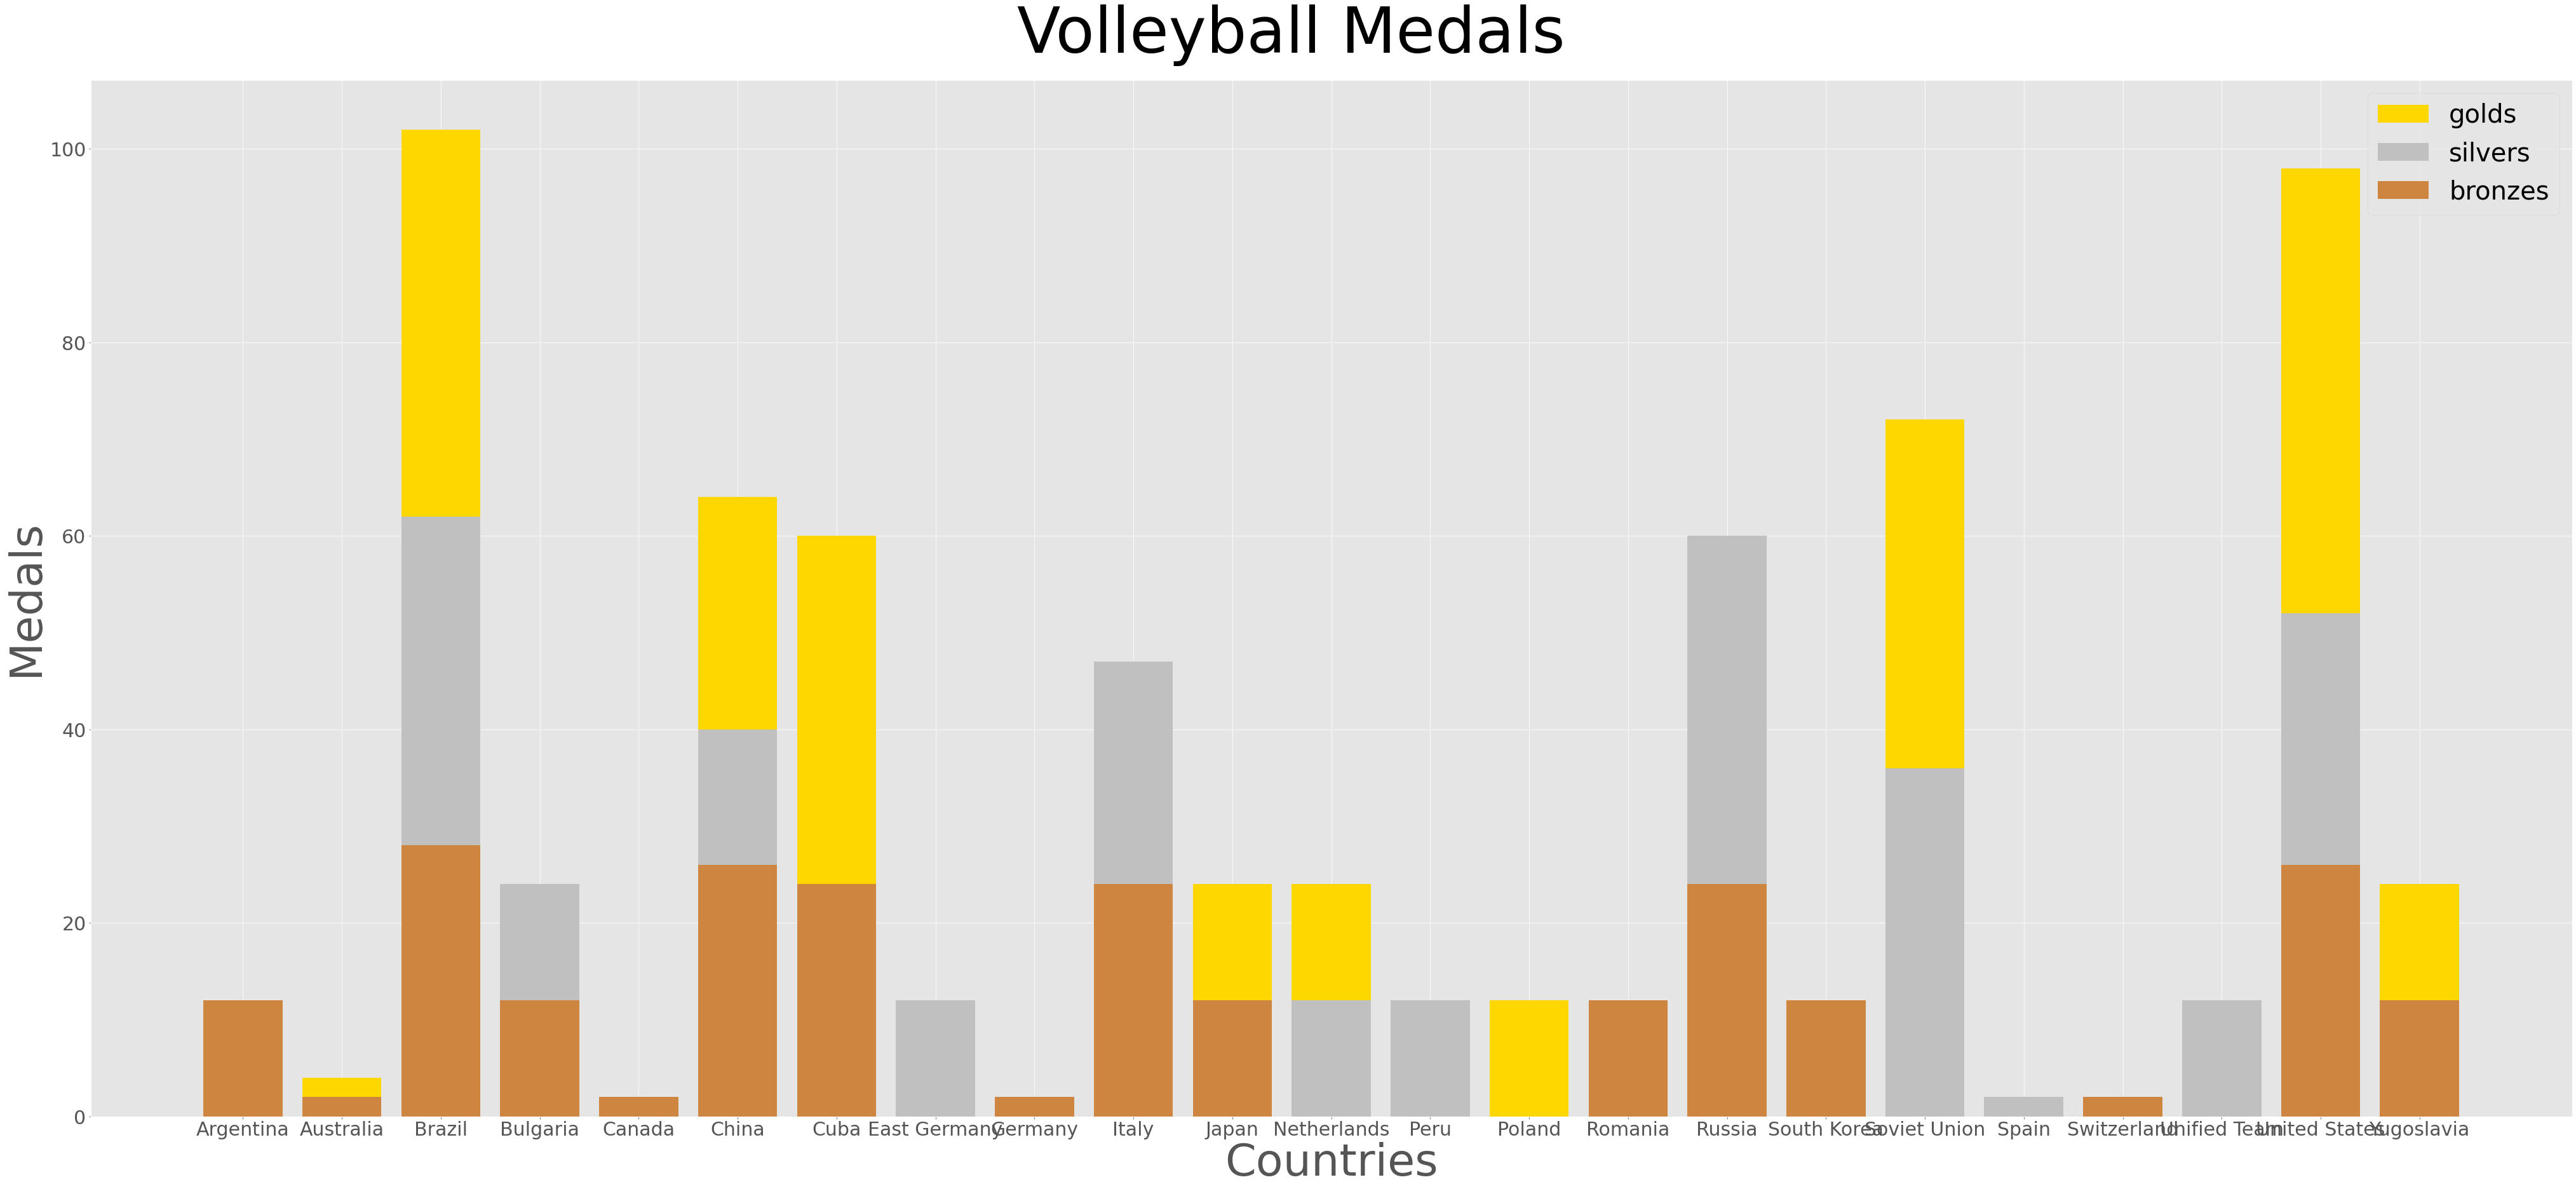

In [304]:
goldVRS = goldVS [ 0:len(goldVS) ] [::-1]
silverVRS = silverVS [ 0:len(silverVS) ] [::-1]
bronzeVRS = bronzeVS [ 0:len(bronzeVS) ] [::-1]
plotTogetherLists(goldVRS,silverVRS,bronzeVRS, "Volleyball Medals")

<strong><center>Top three countries: Brazil, United States, Soviet Union</center></strong>

<strong><div style = "height:100px;line-height:100px;text-align:center;background-color:#00ff99;font-size:50px;border-radius:25px;font-family: Times New Roman">
  Event Scores
</div></strong>

<b><div style = "font-family: Times New Roman;">Medal Point Values:</div></b>
<ul>
<li style = "font-family: Times New Roman;">Gold = 3 points</li>
<li style = "font-family: Times New Roman;">Silver = 2 points</li>
<li style = "font-family: Times New Roman;">Bronze = 1 point</li>
</ul>

In [66]:
def CalculateScore(gold, silver, bronze):
    score = {}
    for x in gold:
        if x[0] in score: score [x[0]] = score [x[0]] + (x[1] * 3)
        else:  score [x[0]] = x[1] * 3      

    for x in silver:
        if x[0] in score: score [x[0]] = score [x[0]] + (x[1] * 2)
        else:  score [x[0]] = x[1] * 2 

    for x in bronze:
        if x[0] in score: score [x[0]] = score [x[0]] + (x[1])
        else:  score [x[0]] = x[1]

    Score = sorted (score.items(), key = operator.itemgetter(1), reverse=True)

    for i in range(0,len(Score),1):
        print (Score[i][0]+"\t"+str(Score[i][1]))
    print("\n")
    return Score
    

<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Archery Scores</b>
</div></body></center>

In [67]:
print("Archery Scores")
ScoreA = CalculateScore(goldAS, silverAS, bronzeAS)

Archery Scores
South Korea	39
United States	19
Soviet Union	11
China	7
Italy	5
Japan	5
Finland	4
Australia	4
Ukraine	4
France	3
Sweden	2
United Kingdom	2
Unified Team	1
Netherlands	1
Russia	1




<center><body><div style = "height:50px;line-height:50px;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Diving 3M Springboard Scores</b>
</div></body></center>

In [45]:
print("Diving 3M Springboard Scores")
ScoreD3 = CalculateScore(goldD3S, silverD3S, bronzeD3S)

Diving 3M Springboard Scores
China	47
United States	22
Canada	8
Soviet Union	7
Russia	7
East Germany	5
Mexico	4
Italy	3
Unified Team	3
Germany	2




<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Diving 10M Springboard Scores</b>
</div></body></center>

In [46]:
print("Diving 10M Springboard Scores")
ScoreD10 = CalculateScore(goldD10S, silverD10S, bronzeD10S)

Diving 10M Springboard Scores
China	39
United States	24
Soviet Union	10
Australia	9
East Germany	6
Russia	5
Germany	4
Italy	3
Canada	3
Sweden	2
Unified Team	2
Mexico	1




<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Gymnastics Floor Exercises Scores</b>
</div></body></center>

In [47]:
print("Gymnastics Floor Exercises Scores")
ScoreG = CalculateScore(goldGS, silverGS, bronzeGS)

Gymnastics Floor Exercises Scores
Romania	27
Soviet Union	24
China	14
Russia	9
United States	9
East Germany	4
Japan	4
Ukraine	3
Greece	3
Latvia	3
Canada	3
Unified Team	3
Spain	3
Bulgaria	3
Hungary	2
France	1




<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Hockey Scores</b>
</div></body></center>

In [73]:
print("Hockey Scores")
ScoreH = CalculateScore(goldHS, silverHS, bronzeHS)

Hockey Scores
Netherlands	318
Australia	305
Germany	195
Spain	144
West Germany	96
South Korea	96
Pakistan	80
United Kingdom	80
Argentina	64
New Zealand	48
India	48
Zimbabwe	48
Czechoslovakia	32
China	32
Soviet Union	32
United States	16




<center><body><div style = "height:50px;line-height:50px;text-align:center;background-color:gold;font-size:40px;border-radius:25px;font-family: Times New Roman;color:blue;width:75%">
    <b>Volleyball Scores</b>
</div></body></center>

In [49]:
print("Volleyball Scores")
ScoreV = CalculateScore(goldVS, silverVS, bronzeVS)

Volleyball Scores
United States	216
Brazil	216
Soviet Union	180
Cuba	132
China	126
Russia	96
Italy	70
Netherlands	60
Japan	48
Yugoslavia	48
Poland	36
Bulgaria	36
East Germany	24
Peru	24
Unified Team	24
South Korea	12
Romania	12
Argentina	12
Australia	8
Spain	4
Canada	2
Germany	2
Switzerland	2




<strong><div style = "height:100px;line-height:100px;text-align:center;background-color:#00ff99;font-size:50px;border-radius:25px;font-family: Times New Roman">
  Weather Data
</div></strong>

<b><div style = "font-family: Times New Roman;">What we are trying to determine:</div></b>
<ul>
<li style = "font-family: Times New Roman;">Main question: Do warmer countries have a tenedency to perform better in the summer olympics as opposed to colder countries?</li>
<li style = "font-family: Times New Roman;">Secondary question: Does the event being conducted inside or outside affect the country's performance?</li>
</ul>
<b><div style = "font-family: Times New Roman;">Color key:</div></b>
<ul>
<li style = "font-family: Times New Roman;">Red = Extremely Warm</li>
<li style = "font-family: Times New Roman;">Gold = Warm</li>
<li style = "font-family: Times New Roman;">Yellow = Moderate</li>
<li style = "font-family: Times New Roman;">Mint Green = Cold</li>
<li style = "font-family: Times New Roman;">Turquoise = Extremely Cold</li>
</ul>

In [69]:
weather = open('../data/Weather.txt','r')
dataWeather = weather.readlines()

dataW = {}
for x in dataWeather:
    temp = x.split()
    if(len(temp) != 2):
        temp2 = temp[0] + " " + temp[1]
        dataW[temp2] = temp[len(temp)-1]
    else:
        dataW[temp[0]] = temp[len(temp)-1]
    
dataWA = {}
for x in ScoreA:
    dataWA[x[0]] = dataW[x[0]]
    
dataWD3 = {}
for x in ScoreD3:
    dataWD3[x[0]] = dataW[x[0]]
    
dataWD10 = {}
for x in ScoreD10:
    dataWD10[x[0]] = dataW[x[0]]
    
dataWG = {}
for x in ScoreG:
    dataWG[x[0]] = dataW[x[0]]
    
dataWH = {}
for x in ScoreH:
    dataWH[x[0]] = dataW[x[0]]
    
dataWV = {}
for x in ScoreV:
    dataWV[x[0]] = dataW[x[0]]

In [285]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plotOneList (score, title):
    plt.style.use('ggplot')
    plt.figure(figsize=(30,10)) 
    
    x = list(score.keys())
    y = []
    for item in score:
        y.append(float(score.get(item)))
        
    colors = []
    for item in score:
        if(float(score.get(item)) >= 20):
            colors.append('tomato')
        if(float(score.get(item)) < 20 and float(score.get(item)) >= 15):
            colors.append('gold')
        if(float(score.get(item)) < 15 and float(score.get(item)) >= 10):
            colors.append('yellow')
        if(float(score.get(item)) < 10 and float(score.get(item)) >= 5):
            colors.append('palegreen')
        if(float(score.get(item)) < 5 and float(score.get(item)) > 0):
            colors.append('mediumturquoise')

    x_pos = [i for i, _ in enumerate(x)]

    plt.bar(x_pos, y, color = colors)
    plt.xlabel("Countries", fontsize = 30)
    plt.ylabel("Average Temperature", fontsize = 30)
    plt.figtext(.5,.9, title, fontsize=35, ha='center')

    plt.xticks(x_pos, x)

    plt.show()

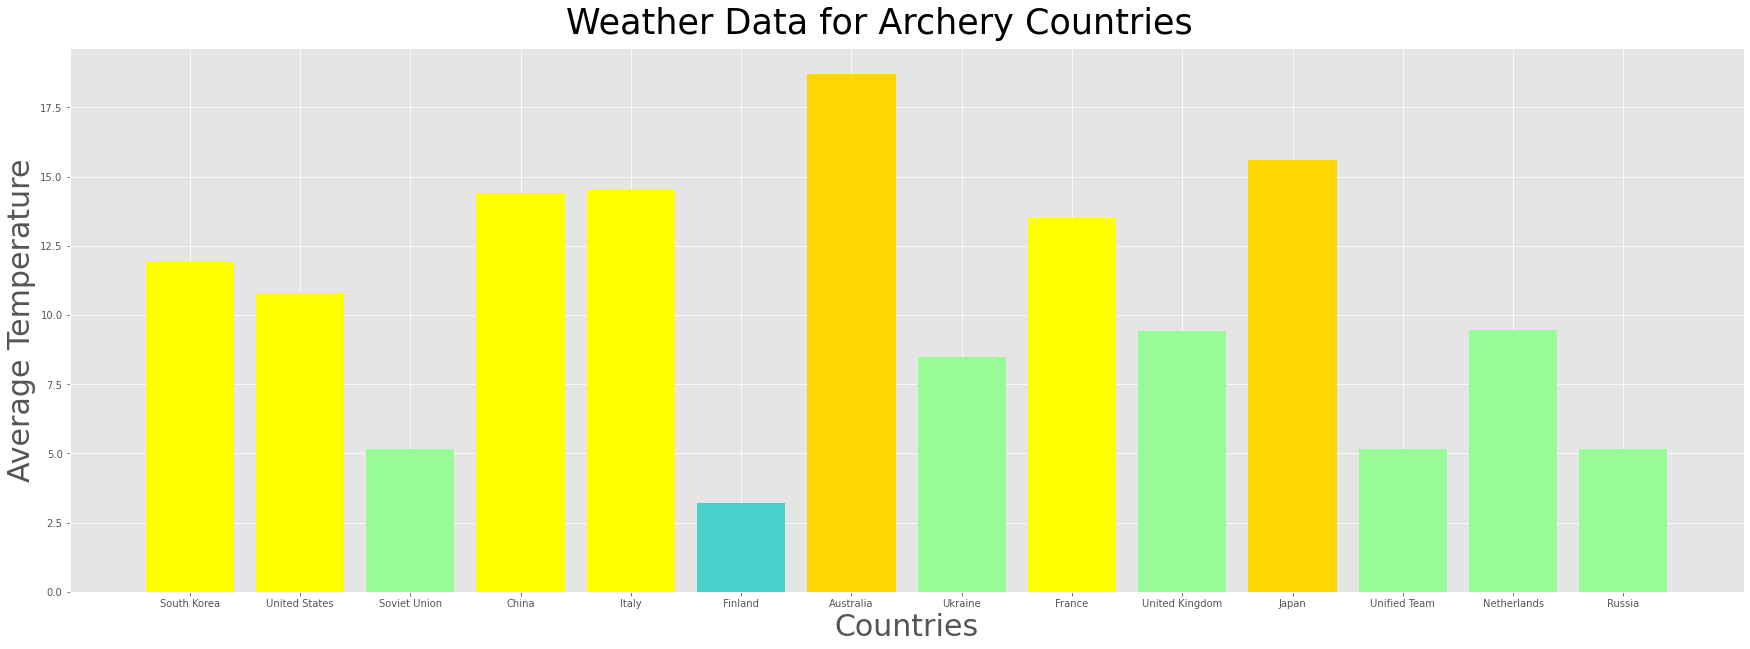

In [286]:
plotOneList(dataWA, "Weather Data for Archery Countries")

<b><div style = "font-family: Times New Roman;">Notes:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The countries are listed from left to right depending on the number of medals each country received in archery with the left being the greatest number of medals and the right being the least number of medals.</li>
<li style = "font-family: Times New Roman;">This event is conducted outside.</li>
</ul>
    
<b><div style = "font-family: Times New Roman;">Observations:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The moderate countries (yellow) performed the best in archery, with France being an outlier.</li>
<li style = "font-family: Times New Roman;">The warm countries (gold) performed average. However, Finland is an extremely cold country and is also found in this range.</li>
<li style = "font-family: Times New Roman;">The cold countries (mint green) performed the worst in archery, with the Soviet Union being an outlier.</li>
<li style = "font-family: Times New Roman;">The colder countries are found more so on the right side of the graph, whereas the moderate and warm countries are found more so on the left side or the middle. This even being conducted outisde could be a reason for colder countries perfomring slightly better. However, there are still outliers that dispute this claim.</li>
</ul>
  
<div style = "font-family: Times New Roman;"><strong><center>Conclusion: there is no obvious correlation between the country's temperature and its performance in archery.</center></strong></div>


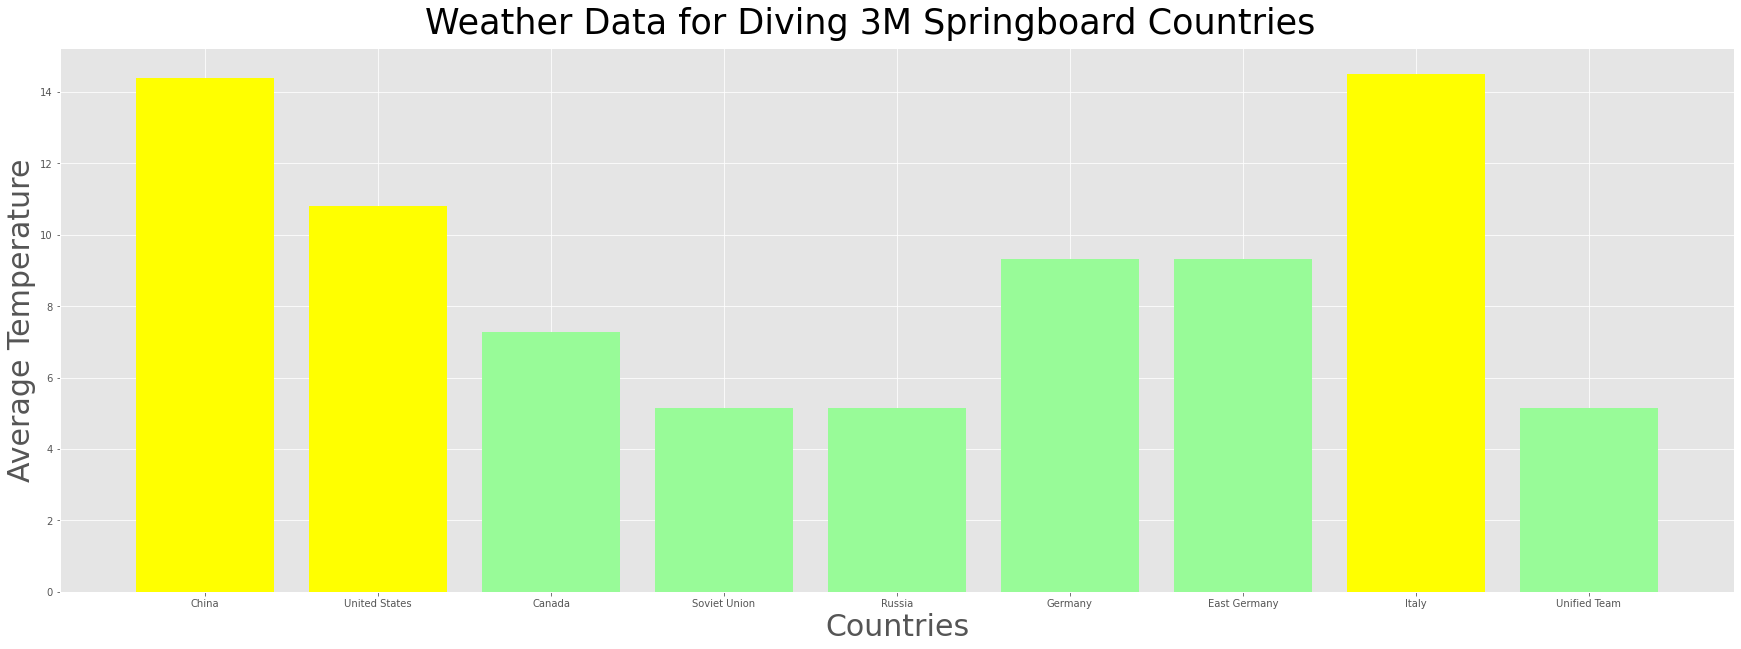

In [287]:
plotOneList(dataWD3, "Weather Data for Diving 3M Springboard Countries")

<b><div style = "font-family: Times New Roman;">Notes:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The countries are listed from left to right depending on the number of medals each country received in 3M diving event with the left being the greatest number of medals and the right being the least number of medals.</li>
<li style = "font-family: Times New Roman;">This event is conducted both inside and outside.</li>
</ul>
    
<b><div style = "font-family: Times New Roman;">Observations:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The moderate countries (yellow) performed the best in 3M diving, with Italy being an outlier.</li>
<li style = "font-family: Times New Roman;">The cold countries (mint green) performed about average, with the Unified Team and Germany both being outliers.</li>
<li style = "font-family: Times New Roman;">Mexico, an extremely warm country (red), also performed  average.</li>
</ul>
  
<div style = "font-family: Times New Roman;"><strong><center>Conclusion: there is no obvious correlation between a country's temperature and its performance in the 3M diving event.</center></strong></div>


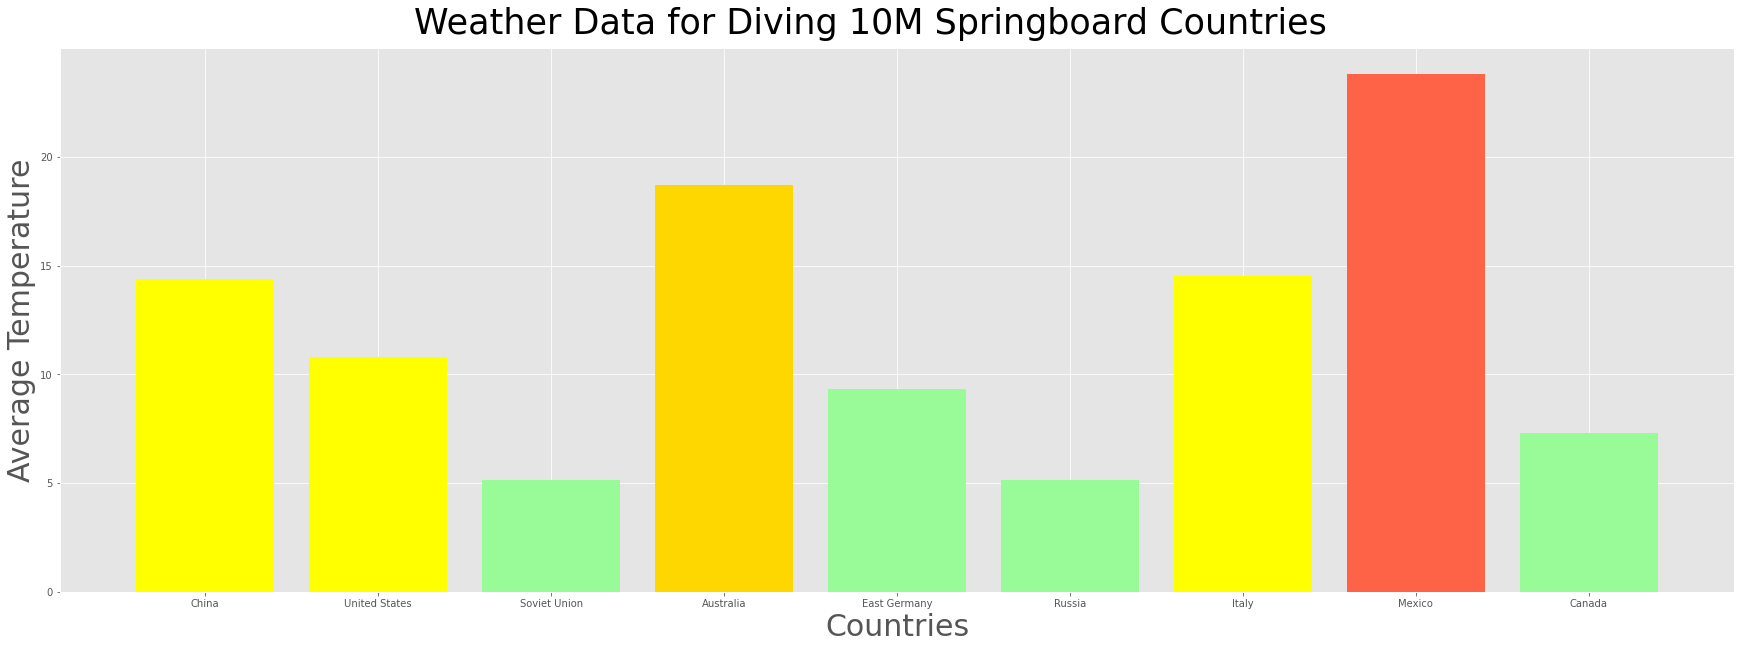

In [288]:
plotOneList(dataWD10, "Weather Data for Diving 10M Springboard Countries")

<b><div style = "font-family: Times New Roman;">Notes:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The countries are listed from left to right depending on the number of medals each country received in the 10M diving event with the left being the greatest number of medals and the right being the least number of medals.</li>
<li style = "font-family: Times New Roman;">This event is conducted both inside and outside.</li>
</ul>
    
<b><div style = "font-family: Times New Roman;">Observations:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The moderate countries (yellow) performed the best in the 10M diving event, with Italy being an outlier again.</li>
<li style = "font-family: Times New Roman;">Australia, a warm country (gold), performed slightly above average.</li>
<li style = "font-family: Times New Roman;">The cold countries (mint green) performed both average and below average, with the Soviet Union being an outlier.</li>
<li style = "font-family: Times New Roman;">Mexico, an extremely warm country (red), also performed very below avergage.</li>
</ul>
  
<div style = "font-family: Times New Roman;"><strong><center>Conclusion: there is no obvious correlation between a country's temperature and its performance in the 10M diving event.</center></strong></div>

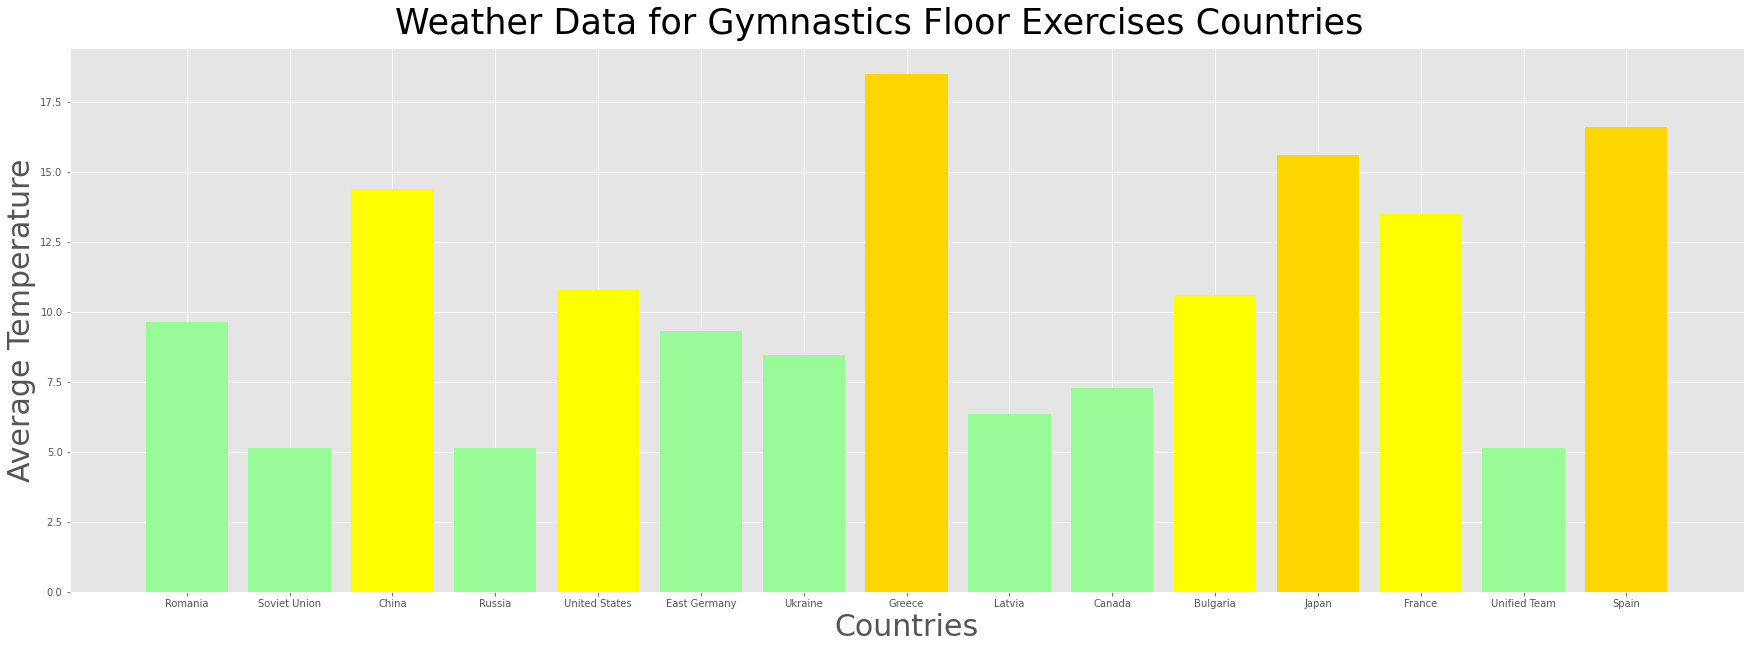

In [289]:
plotOneList(dataWG, "Weather Data for Gymnastics Floor Exercises Countries")

<b><div style = "font-family: Times New Roman;">Notes:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The countries are listed from left to right depending on the number of medals each country received in the gymnastics floor exercise with the left being the greatest number of medals and the right being the least number of medals.</li>
<li style = "font-family: Times New Roman;">This event is conducted inside.</li>
</ul>
    
<b><div style = "font-family: Times New Roman;">Observations:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The cold countries (mint green) performed the best in the gymnastics floor exercise event. However, there are cold countries that also performed average and below average.</li>
<li style = "font-family: Times New Roman;">The warm countries (gold) performed either average or below average.</li>
<li style = "font-family: Times New Roman;">The moderate countries (yellow) performed both above average and extremely below average.</li>
<li style = "font-family: Times New Roman;">The colder countries are found more so on the left side of the graph, whereas the moderate and warm countries are found more so on the right side. This even being conducted inside could be a reason for colder countries perfomring slightly better. However, there are still outliers that dispute this claim.</li>
</ul>
  
<div style = "font-family: Times New Roman;"><strong><center>Conclusion: there is no obvious correlation between a country's temperature and its performance in the gymnastics floor exercise event.</center></strong></div>

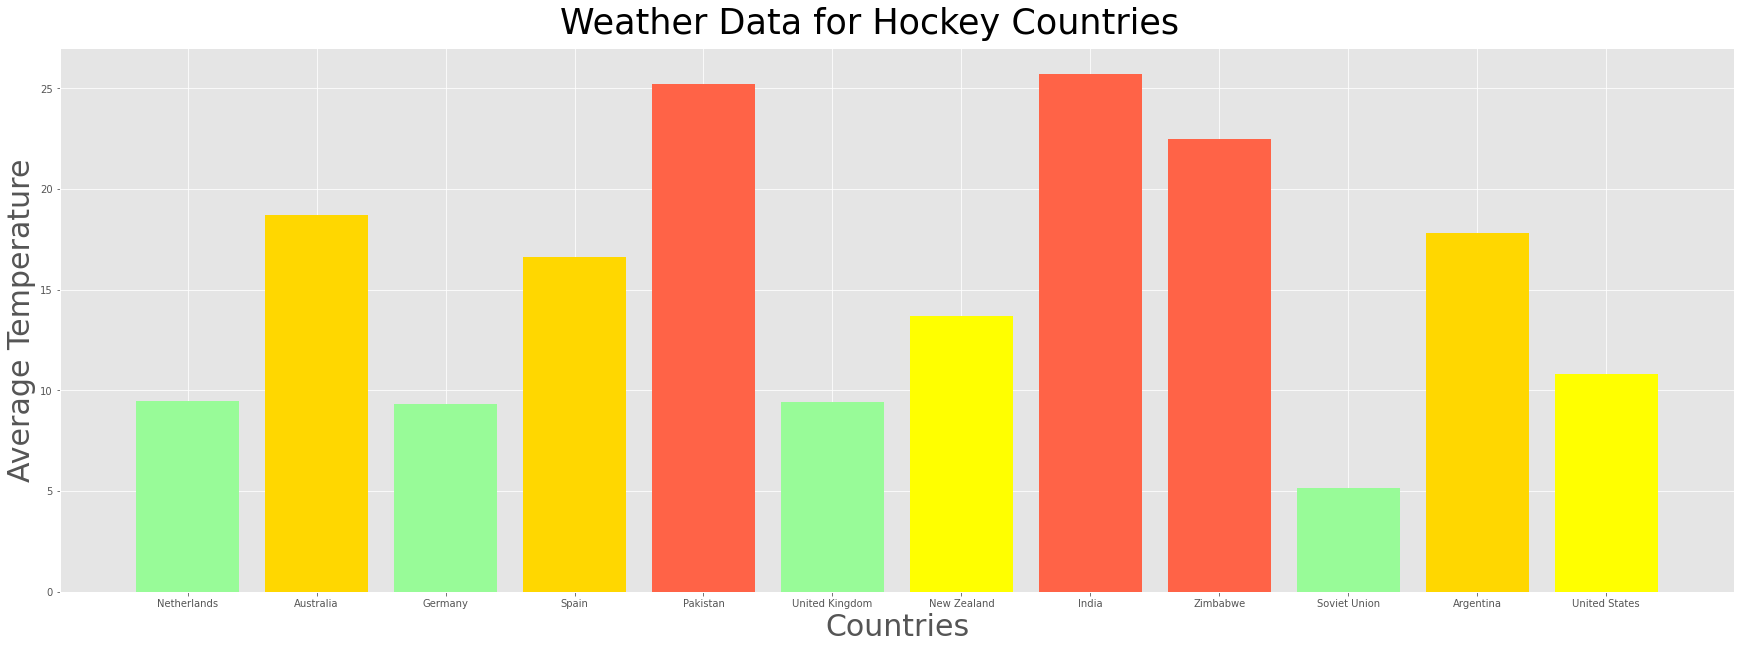

In [290]:
plotOneList(dataWH, "Weather Data for Hockey Countries")

<b><div style = "font-family: Times New Roman;">Notes:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The countries are listed from left to right depending on the number of medals each country received in Hockey with the left being the greatest number of medals and the right being the least number of medals.</li>
<li style = "font-family: Times New Roman;">This event is conducted inside or outside.</li>
</ul>
    
<b><div style = "font-family: Times New Roman;">Observations:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The only two countries of the same temperature range that received a similar number of medals are India and Zimbawe, both extremely warm countries.</li>
<li style = "font-family: Times New Roman;">Countries that fall within the same temperature ranges (warm, moderate, cold, and extremely cold) are evenly spread out across the graph.</li>
</ul>
<div style = "font-family: Times New Roman;"><strong><center>Conclusion: there is absolutely no correlation between a country's temperature and its performance in the hockey event.</center></strong></div>

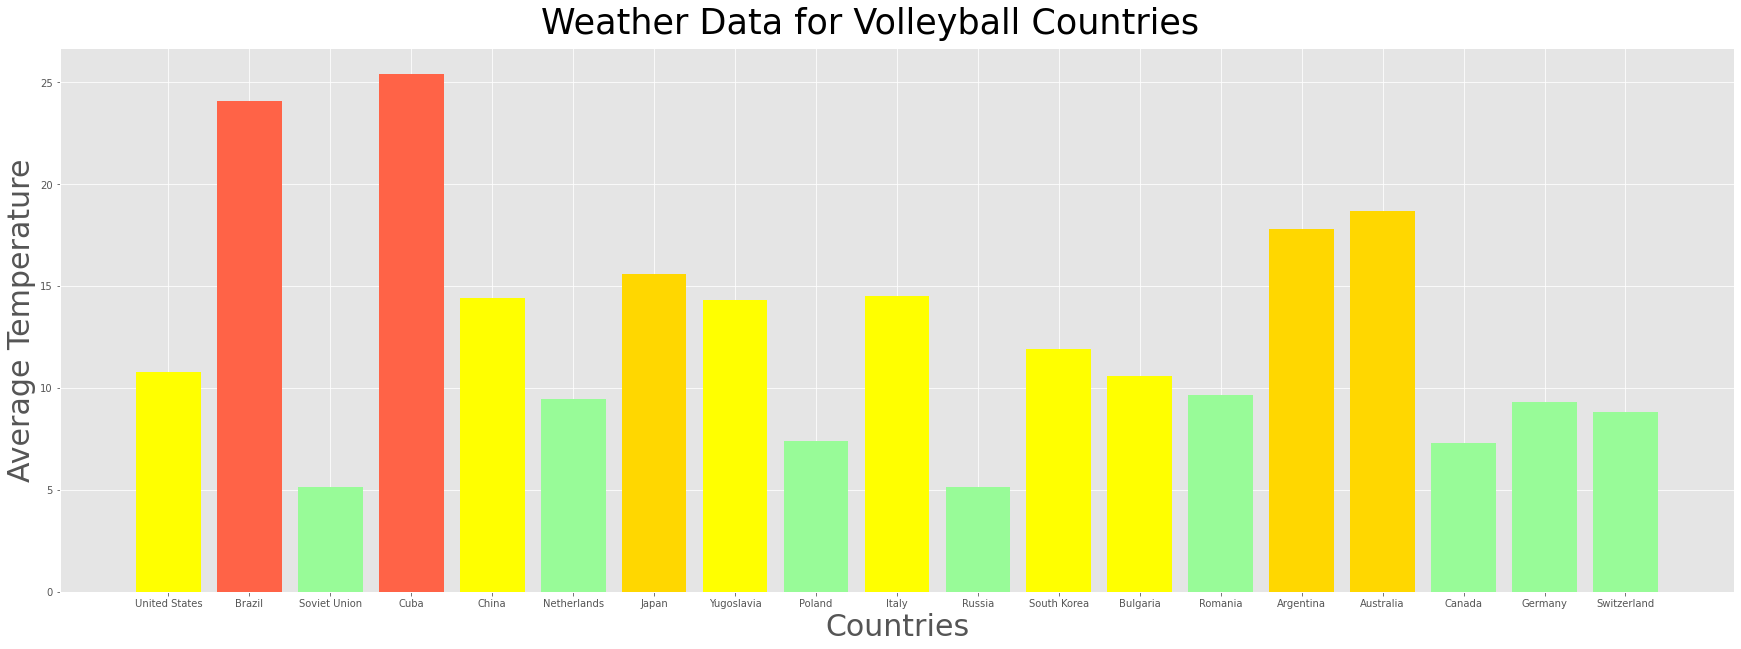

In [291]:
plotOneList(dataWV, "Weather Data for Volleyball Countries")

<b><div style = "font-family: Times New Roman;">Notes:</div></b>
<ul>
<li style = "font-family: Times New Roman;">The countries are listed from left to right depending on the number of medals each country received in volleyball with the left being the greatest number of medals and the right being the least number of medals.</li>
<li style = "font-family: Times New Roman;">This event is conducted inside.</li>
</ul>
    
<b><div style = "font-family: Times New Roman;">Observations:</div></b>
<ul>
<li style = "font-family: Times New Roman;">Countries that fall within the same temperature ranges (extremely warm, warm, moderate, cold, and extremely cold) are all spread out across the graph.</li>
<li style = "font-family: Times New Roman;">There are a few countries of the same temperature range that are lumped together, but not enough that it would indicate any sort of correlation.</li>

</ul>
<div style = "font-family: Times New Roman;"><strong><center>Conclusion: there is absolutely no correlation between a country's temperature and its performance in the volleyball event.</center></strong></div>

<strong><div style = "height:100px;line-height:100px;text-align:center;background-color:#00ff99;font-size:50px;border-radius:25px;font-family: Times New Roman">
  Overall Conclusions:
</div></strong>

<b><div style = "font-family: Times New Roman;">Conclusions:</div></b>
<ul>
<li style = "font-family: Times New Roman;">Each graph listed the countries from left to right depending on the number of medals the country received with the left being the greatest number of medals and the right being the least number of medals. We wanted to know if warmer countries performed better in the summer olympics overall. If that were the case, the warmer countries would be primarily on the left side of each graph and the colder countries would be on the right side of each graph. After examining all the graphs, warmer countries did not perform better in the summer olympics overall. Countries of all temperature ranges were found anywhere along the x-axis of the graphs.</li>
<li style = "font-family: Times New Roman;">The only two events that indicated a slight correlation between a country's average temperature and performance in an event was archery and the gymnastics floor exercise. Colder countries seemed to perform better in gymnastics (an inside event), whereas warmer countries seemed to perform better in archery (an outside event). Nevertheless, there was no obvious correlation and were several outliers within the graphs for each event. The other events we observed did not indicate a correlation between a countries temperature and whether or not the even took place outside or inside.</li>
</ul>

<b><div style = "font-family: Times New Roman;">Unexpected Outcomes:</div></b>
<ul>
<li style = "font-family: Times New Roman;">Canada not being in the top countries for Hockey.
</li>
<li style = "font-family: Times New Roman;">The Soviet Union not being being higher in the top countries for Hockey (this expectation was largely based on the movie "Miracle").</li>
</ul>

<b><div style = "font-family: Times New Roman;">Things we could have done differently or better:</div></b>
<ul>
<li style = "font-family: Times New Roman;">Take into account the fact that some countries' names changed over the years (Germany, Soviet Union, and Yugoslavia). </li>
<li style = "font-family: Times New Roman;">Instead of looking at the Olympics, look at a different type of contest, such as chess or anything more academic.</li>
</ul> 